In [1]:
!pip install cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score




ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


# Load Data

In [2]:
# load the data into a pandas dataframe

data_path = r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Data\portuguesebankall.csv"
df = pd.read_csv(data_path)

# preview data
df.info()
df.head
print(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        41188 non-null  int64  
 1   JOB        41188 non-null  object 
 2   MARITAL    41188 non-null  object 
 3   EDUCATION  41188 non-null  object 
 4   DEFAULT    41188 non-null  object 
 5   HOUSING    41188 non-null  object 
 6   LOAN       41188 non-null  object 
 7   CONTACT    41188 non-null  object 
 8   MONTH      41188 non-null  object 
 9   DOW        41188 non-null  object 
 10  DURATION   41188 non-null  int64  
 11  CAMPAIGN   41188 non-null  int64  
 12  PDAYS      41188 non-null  int64  
 13  PREVIOUS   41188 non-null  int64  
 14  POUTCOME   41188 non-null  object 
 15  EMPVAR     41188 non-null  float64
 16  CPI        41188 non-null  float64
 17  CCI        41188 non-null  float64
 18  EURIBOR3M  41188 non-null  float64
 19  NREMP      41188 non-null  float64
 20  RESPON

# Preprocess Data


*   Drop unnecessary variables
*   Convert target to numeric




In [3]:
# drop unnecessary columns
df.drop(['DURATION'], axis=1, inplace=True)
# convert diagnosis variable to numerical (optional)
df['RESPOND'] = df['RESPOND'].apply(lambda x: 1 if x == 'yes' else 0)
# Convert response from an integer to a categorical variable
df['RESPOND'] = df['RESPOND'].astype('category')
df.head()



,AGE,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,DOW,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMPVAR,CPI,CCI,EURIBOR3M,NREMP,RESPOND
0,17,student,single,unknown,no,yes,no,cellular,aug,wed,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,0
1,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,0
2,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,0
3,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,1
4,17,student,single,unknown,no,no,yes,cellular,oct,tue,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,1


# Split data into training and test sets

Before splitting
*   Separate X and y variables into separate data frames
*   Create dummy variables



In [4]:
# split the data into training and testing sets
X = df.drop(['RESPOND'], axis=1)
X=df[['AGE', 'JOB','MARITAL','EDUCATION','DEFAULT','HOUSING','LOAN','CONTACT', 'MONTH','DOW','CAMPAIGN','PDAYS','PREVIOUS','POUTCOME','EMPVAR', 'CPI','CCI','EURIBOR3M','NREMP']]
X = pd.get_dummies(X, columns=['JOB', 'MARITAL', 'EDUCATION','DEFAULT','HOUSING','LOAN','CONTACT','MONTH','DOW','POUTCOME'], drop_first=True)

y = df['RESPOND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()




<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 39075 to 15795
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AGE                            28831 non-null  int64  
 1   CAMPAIGN                       28831 non-null  int64  
 2   PDAYS                          28831 non-null  int64  
 3   PREVIOUS                       28831 non-null  int64  
 4   EMPVAR                         28831 non-null  float64
 5   CPI                            28831 non-null  float64
 6   CCI                            28831 non-null  float64
 7   EURIBOR3M                      28831 non-null  float64
 8   NREMP                          28831 non-null  float64
 9   JOB_blue-collar                28831 non-null  bool   
 10  JOB_entrepreneur               28831 non-null  bool   
 11  JOB_housemaid                  28831 non-null  bool   
 12  JOB_management                 28831 non-null  

# Decision Tree  
We will use 3 parameters to control the growth of the tree

- **max_depth** determines the maximum number of levels for the tree.  Smaller values help to prevent overfitting.  Default value = None

- **min_samples_leaf** determines the minimum number of observations that must remain in a leaf.  If a split leaves fewer than this number of observations, the split cannot be performed.  Larger values help to prevent overfitting.  Default value = 1.

- **ccp_alpha** is the cost complexity parameter and can be used for post-pruning the tree to help prevent overfitting.  Default value = 0.  Larger values yield a smaller tree.

In [5]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=10, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)



DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=10)

# Visualize Tree

# Make Predictions on the training and test data

In [6]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)



## Assess Model on Training and Test data

In [7]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9035
Precision: 0.6612
Recall.  : 0.2757

 -- test set -- 
Accuracy : 0.9003
Precision: 0.6644
Recall.  : 0.2749


#Generate a confusion matrix for the training and test data

In [8]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[25163  2328]
 [  454   886]]
[[10733  1034]
 [  198   392]]


#Generate ROC curves for training and test data

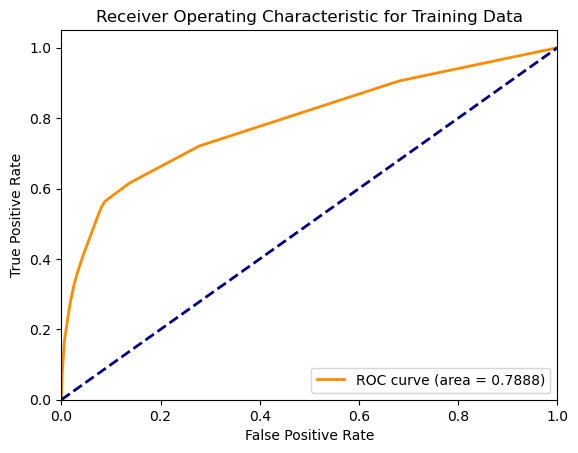

In [9]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

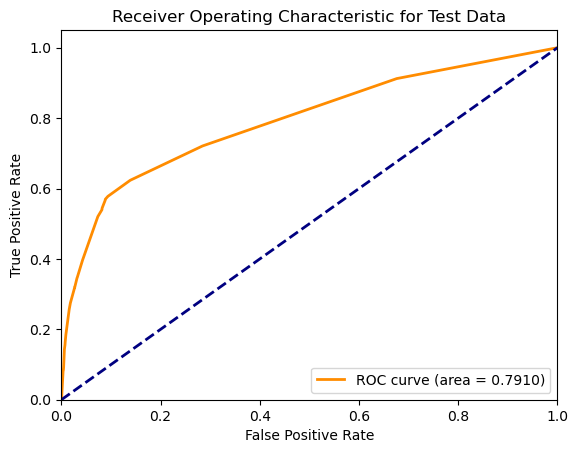

In [10]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


#Print feature importance for the tree

    importance                        feature
8     0.645957                          NREMP
51    0.115565               POUTCOME_success
7     0.069128                      EURIBOR3M
6     0.062914                            CCI
44    0.023501                      MONTH_oct
36    0.017387              CONTACT_telephone
2     0.013649                          PDAYS
0     0.010637                            AGE
3     0.009641                       PREVIOUS
4     0.008603                         EMPVAR
46    0.008593                        DOW_mon
1     0.005005                       CAMPAIGN
41    0.002839                      MONTH_mar
5     0.002504                            CPI
20    0.001908                MARITAL_married
25    0.001313          EDUCATION_high.school
28    0.000855    EDUCATION_university.degree
45    0.000000                      MONTH_sep
37    0.000000                      MONTH_aug
34    0.000000                   LOAN_unknown
35    0.000000                    

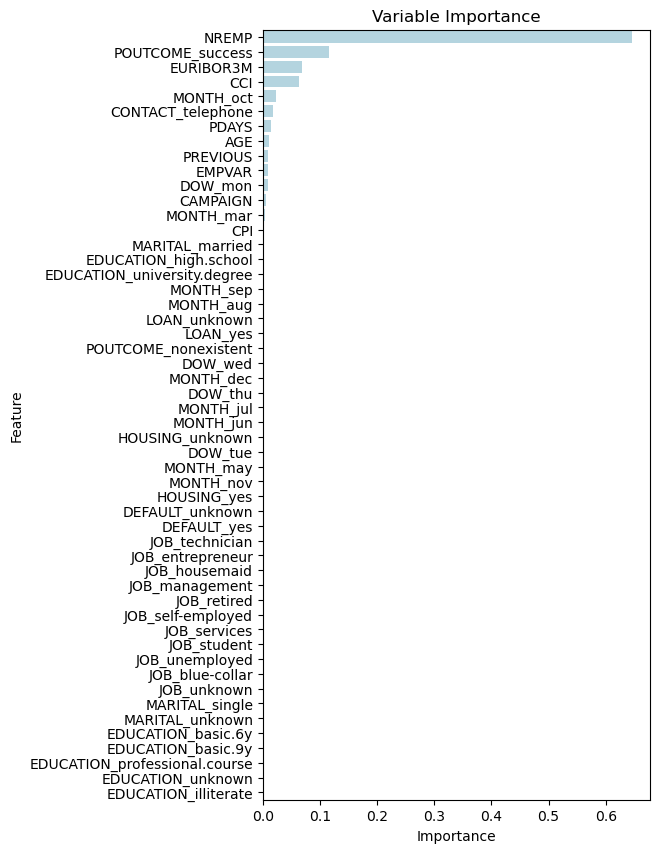

In [11]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

Using the feature importances to create a neural network that can classify responses

In [36]:
neural_df = X[['NREMP', 'POUTCOME_success', 'EURIBOR3M', 'CCI', 'MONTH_oct', 'CONTACT_telephone', 'CPI', 'PDAYS', 'AGE', 'PREVIOUS', 'DOW_mon', 'CAMPAIGN']]
neural_df['RESPOND'] = y
neural_df.shape

(41188, 13)

Learning Rates

In [37]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

Create the model

In [38]:
model = models.Sequential()

Input Layer

In [39]:
input_shape = (neural_df.shape[1] - 1,)
model.add(layers.InputLayer(input_shape=input_shape))

c:\Users\trush\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Hidden Layers

In [40]:
model.add(layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(layers.Dense(8, activation='relu'))

Output Layer

In [41]:
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
X = neural_df.drop(columns=['RESPOND'])
y = neural_df['RESPOND'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8799 - loss: 9.1779
Epoch 2/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8873 - loss: 0.3542
Epoch 3/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8919 - loss: 0.3441
Epoch 4/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8897 - loss: 0.3490
Epoch 5/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8925 - loss: 0.3430
Epoch 6/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8864 - loss: 0.3552
Epoch 7/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8880 - loss: 0.3526
Epoch 8/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8919 - loss: 0.3436
Epoch 9/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.8914 - loss: 0.3445
Epoch 10/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8914 - loss: 0.3452  


In [45]:
metrics = model.evaluate(X_test, y_test)

387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8879 - loss: 0.3509


In [46]:
print(f'Test loss {metrics[0]}')
print(f'Test accuracy {metrics[1]}')

Test loss 0.3577826917171478
Test accuracy 0.8845998048782349
